# Linear Regression
This is the final part of understanding the relationship between the income level of the countries mentioned and the number of engagement it receieves on Twitter.

In [762]:
import pandas as pd

In [763]:
reu_df = pd.read_csv("Reuters Countries.csv") #read csv data

In [764]:
cnn_df = pd.read_csv("CNN Countries.csv") #read csv data

In [765]:
bbc_df = pd.read_csv("BBC Countries.csv") #read csv data

In [954]:
"""
This function takes in the dataframe and updates the dataframe with the relative engagement of each country compare to the mean
"""

def engagement(dataframe):
    mean = dataframe["# of Reactions"].mean()
    for index in range(0,len(dataframe)):
        local_engagement = dataframe.at[index,"# of Reactions"]
        dataframe.at[index,"Relative_engagement"] = round(local_engagement/mean,2)
    return dataframe

In [955]:
engagement(reu_df).head()

,Unnamed: 0,Countries,# of Reactions,Income Level,Relative_engagement
0,0,Hungary,63.0,High income,0.46
1,1,Israel,112.0,High income,0.82
2,2,Latvia,77.0,High income,0.57
3,3,Sweden,221.0,High income,1.62
4,4,South Sudan,89.0,Low income,0.65


In [956]:
engagement(cnn_df).head()

,Unnamed: 0,Countries,# of Reactions,Income Level,Relative_engagement
0,0,NaN,2978.0,High income,1.66
1,1,Qatar,2554.0,High income,1.42
2,2,Georgia,3718.0,Upper middle income,2.07
3,3,Ghana,318.0,Lower middle income,0.18
4,4,Egypt,1997.0,Lower middle income,1.11


In [968]:
cnn_df.to_csv("CNN Engagement.csv") #for machine learning part

In [957]:
engagement(bbc_df).head()

,Unnamed: 0,Countries,# of Reactions,Income Level,Relative_engagement
0,0,Congo,2731.0,Low income,0.80
1,1,Kazakhstan,1526.0,Upper middle income,0.45
2,2,Cote,654.0,Lower middle income,0.19
3,3,Lao,3578.0,Lower middle income,1.05
4,4,Iceland,1095.0,High income,0.32


In [958]:
cnn_lin = cnn_df[['Income Level','Relative_engagement']] #keep columns needed for x and y

In [ ]:
cnn_df = pd.

In [959]:
bbc_lin = bbc_df[['Income Level','Relative_engagement']] #keep columns needed for x and y

In [960]:
reu_lin = reu_df[['Income Level','Relative_engagement']] #keep columns needed for x and y

In [961]:
#concat all together 
all_lin = [cnn_lin, bbc_lin, reu_lin]
lin_df = pd.concat(all_lin).reset_index()
lin_df = lin_df.drop(columns = "index")

lin_df.drop(lin_df[lin_df['Income Level'] == 'Aggregates'].index, inplace = True)
lin_df.drop(lin_df[lin_df['Income Level'] == 'Not classified'].index, inplace = True)

In [962]:
lin_df.reset_index()

,index,Income Level,Relative_engagement
0,0,High income,1.66
1,1,High income,1.42
2,2,Upper middle income,2.07
3,3,Lower middle income,0.18
4,4,Lower middle income,1.11
...,...,...,...
286,291,Low income,0.70
287,292,Lower middle income,0.99
288,293,Lower middle income,0.62
289,294,Upper middle income,0.87


In [963]:
lin_df = lin_df.rename(columns={'Income Level': 'Income_Level'})

## Plot Boxplot to demonstrate the distribution of engagement for each income level

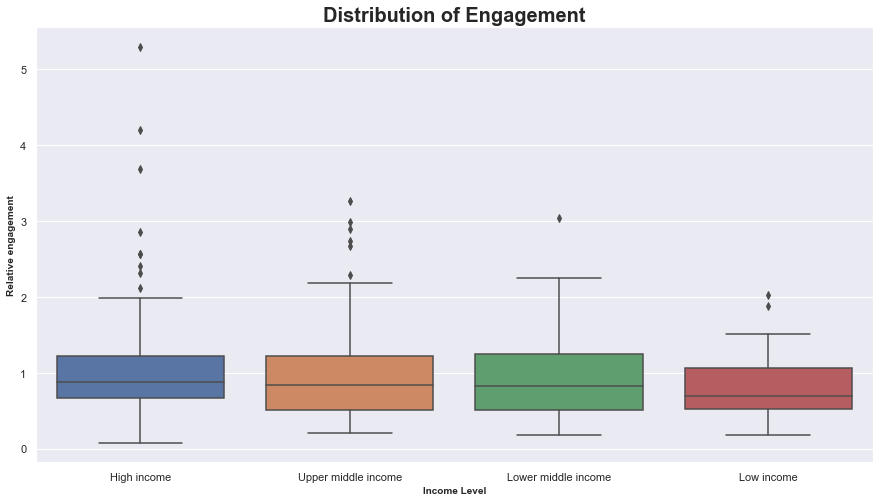

In [964]:
ax = sns.boxplot(x = "Income_Level", y = "Relative_engagement", data = lin_df)
ax.set_title('Distribution of Engagement',fontweight='bold',fontsize=20)
ax.set_xlabel('Income Level',fontweight = 'bold', fontsize=10)
ax.set_ylabel('Relative engagement',fontweight = 'bold', fontsize=10)
ax.figure.savefig("With Outliers.png")

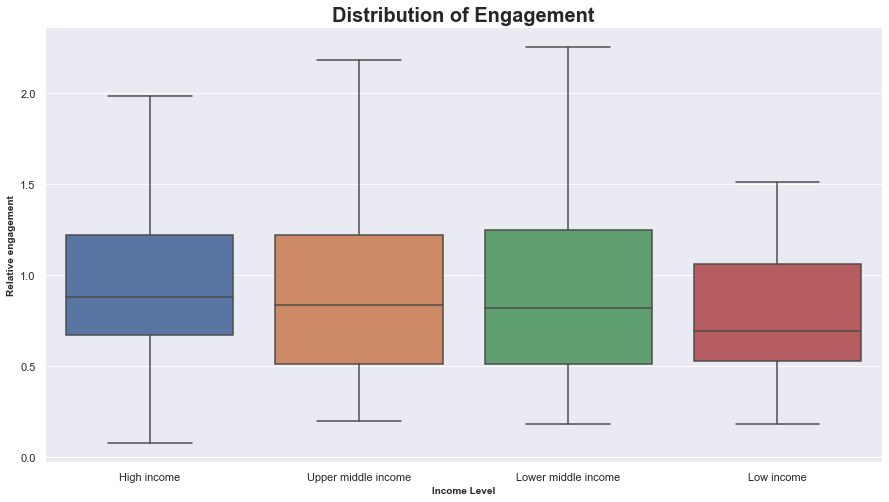

In [965]:
ax = sns.boxplot(x = "Income_Level", y = "Relative_engagement", data = lin_df, showfliers = False)
ax.set_title('Distribution of Engagement',fontweight='bold',fontsize=20)
ax.set_xlabel('Income Level',fontweight = 'bold', fontsize=10)
ax.set_ylabel('Relative engagement',fontweight = 'bold', fontsize=10)
ax.figure.savefig("Without Outliers.png")

## OLS Regression Model

This regressioin shows the relationship between Income Level (independent variable) and Level of Relative engagment (independent variable).

In [966]:
import statsmodels.formula.api as smf

In [967]:
lm = smf.ols('Relative_engagement ~ C(Income_Level)', data = lin_df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Relative_engagement   R-squared:                       0.025
Model:                             OLS   Adj. R-squared:                  0.015
Method:                  Least Squares   F-statistic:                     2.441
Date:                 Thu, 23 Dec 2021   Prob (F-statistic):             0.0645
Time:                         20:10:54   Log-Likelihood:                -286.48
No. Observations:                  285   AIC:                             581.0
Df Residuals:                      281   BIC:                             595.6
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  1.0940      0.064     17.154      0.000       0.968       1.220
C(Income_Level)[T.Low income]             -0.3027      0.119     -2.545      0.011      -0.537      -0.069
C(Income_Level)[T.Lower middle income]    -0.1554      0.104     -1.496      0.136      -0.360       0.049
C(Income_Level)[T.Upper middle income]    -0.0515      0.104     -0.496      0.621      -0.256       0.153
==============================================================================
Omnibus:                      156.914   Durbin-Watson:                   2.127
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              972.067
Skew:                           2.231   Prob(JB):                    8.29e-212
Kurtosis:                      10.871   Cond. No.                         4.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### OLS Result: 
From the table above, the omitted variable is "High income", thus, everything is relative to high income. There are few things to note from this table 
1) The only coefficient that is significant at a 95% Confidence Interval is the Low Income category, with a p-value of 0.01, which is less than 0.05. All other P-values are greater 0.05.

2) The intercept 1.0940 is the mean relative engagement for High Income countries.

3) We can interpret the coefficient as the following: 
- The coefficient for "Low income" is -0.3027. This means that low income countries gets 0.3027 unit lower in the level of relative engagement compared to high income countries. 
- The coefficient for "Lower middle income" is -0.1554. This means that lower middle income countries gets 0.1554 unit lower in the level of relative engagement compared to high income countries.
- The coefficient for "Upper middle income" is -0.0515. This means that upper middle income countries gets 0.0515 unit lower in the level of relative engagement compared to high income countries.

As the countries moves up the income level, it gets closer to the level of engagement that high income countries gets. However, only low income coefficient is statistically significant, so we cannot prove the causal relatinoship for others coefficients. 